In [47]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import time

In [68]:
# Read CSV file into DataFrame
gender_pop= pd.read_csv('Resources/gender_pop_jan_full.csv')
gender_transpose= gender_pop.T
gender_transpose.rename(columns=gender_transpose.iloc[0], inplace = True)
gender_drop=gender_transpose.drop(gender_transpose.index[0])
gender_drop['Male']=gender_drop['Male'].astype(float)
gender_drop['Female']=gender_drop['Female'].astype(float)
gender_drop['Total']=gender_drop['Total'].astype(float)
gender_index=gender_drop.set_index(gender_drop.index.map(lambda x: pd.to_datetime(x, errors='ignore')))
gender_index.head()

,Male,Female,Total
1925-01-01,58399000.0,56570000.0,114969000.0
1926-01-01,59200500.0,57412500.0,116613000.0
1927-01-01,59992500.0,58223500.0,118216000.0
1928-01-01,60749000.0,59023000.0,119772000.0
1929-01-01,61390500.0,59747500.0,121138000.0


<AxesSubplot:>

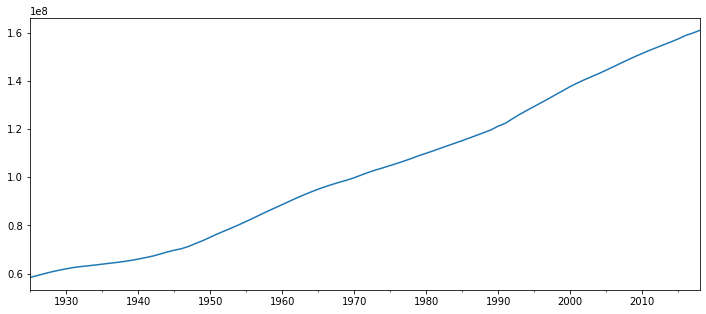

In [49]:
#Plot Male Data
gender_index['Male'].plot(figsize=(12,5))

<AxesSubplot:>

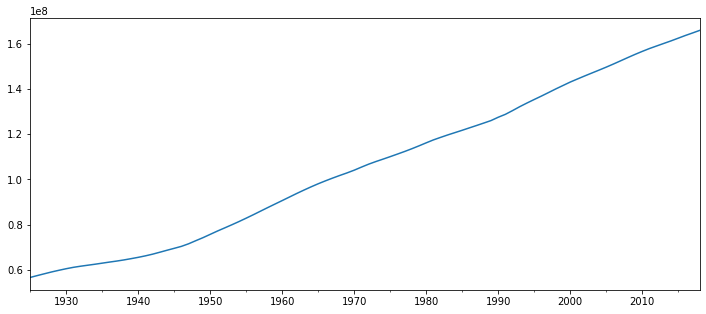

In [50]:
#Plot Female Data
gender_index['Female'].plot(figsize=(12,5))

In [51]:
#Run Adfuller test
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag ='AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-value : ", dftest[1])
    print("3. Num of Lags :", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [52]:
#Adf results male
ad_test(gender_index['Male'])

1. ADF:  0.3884758267904209
2. P-value :  0.9810588265100234
3. Num of Lags : 2
4. Num of Observations Used For ADF Regression and Critical Values Calculation : 91
5. Critical Values :
	 1% :  -3.50434289821397
	 5% :  -2.8938659630479413
	 10% :  -2.5840147047458037


In [53]:
#Adf results female
ad_test(gender_index['Female'])

1. ADF:  -0.18337069358710142
2. P-value :  0.9404749760519336
3. Num of Lags : 1
4. Num of Observations Used For ADF Regression and Critical Values Calculation : 92
5. Critical Values :
	 1% :  -3.503514579651927
	 5% :  -2.893507960466837
	 10% :  -2.583823615311909


In [54]:
#Import auto_arima
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [55]:
#Fit male with auto_arima
male_fit= auto_arima(gender_index['Male'], trace=True,
                            suppress_warnings=True)
male_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2445.394, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2437.417, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2439.450, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2439.399, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2441.406, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2439.318, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.166 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1217.709
Date:                Wed, 10 Mar 2021   AIC                           2437.417
Time:                        15:11:27   BIC                           2439.939
Sample:                             0   HQIC                          2438.435
                                 - 94                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.798e+10   1.14e+09     15.785      0.000    1.57e+10    2.02e+10
===================================================================================
Ljung-Box (L1) (Q):                   4.15   Jarque-Bera (JB):               293.50
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
#Fit female with auto_arima
female_fit= auto_arima(gender_index['Female'], trace=True,
                            suppress_warnings=True)
female_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2373.849, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2365.936, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2367.785, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2367.811, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2368.567, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2367.793, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.134 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1181.968
Date:                Wed, 10 Mar 2021   AIC                           2365.936
Time:                        15:11:28   BIC                           2368.458
Sample:                             0   HQIC                          2366.954
                                 - 94                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.265e+09   6.52e+08     12.677      0.000    6.99e+09    9.54e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):               111.42
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             1.49
Prob(H) (two-sided):                  0.10   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
#Import ARIMA from statsmodels
from statsmodels.tsa.arima_model import ARIMA

In [81]:
#Get train test split
print(gender_index.shape)
train=gender_index.iloc[:]-30
test=gender_index.iloc[-30:]
print(train.shape, test.shape)
train.head()

(94, 3)
(64, 3) (30, 3)


,Male,Female,Total
1925-01-01,58399000.0,56570000.0,114969000.0
1926-01-01,59200500.0,57412500.0,116613000.0
1927-01-01,59992500.0,58223500.0,118216000.0
1928-01-01,60749000.0,59023000.0,119772000.0
1929-01-01,61390500.0,59747500.0,121138000.0


In [59]:
#Arima female fit
model=ARIMA(train['Female'], order = (0,2,0))
female_model = model.fit()
female_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.Female   No. Observations:                   62
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -785.430
Method:                           css   S.D. of innovations          76825.280
Date:                Wed, 10 Mar 2021   AIC                           1574.860
Time:                        15:11:32   BIC                           1579.114
Sample:                    01-01-1927   HQIC                          1576.531
                         - 01-01-1988                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3814.9516   9756.820      0.391      0.696   -1.53e+04    2.29e+04
==============================================================================
"""

In [89]:
#Arima male fit
model=ARIMA(train['Male'], order = (0,2,0))
male_model = model.fit()
male_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.Male   No. Observations:                   62
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -797.677
Method:                           css   S.D. of innovations          93603.654
Date:                Wed, 10 Mar 2021   AIC                           1599.355
Time:                        19:28:58   BIC                           1603.609
Sample:                    01-01-1927   HQIC                          1601.025
                         - 01-01-1988                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5065.2419   1.19e+04      0.426      0.670   -1.82e+04    2.84e+04
==============================================================================
"""

In [90]:
#Get female predictions
start=len(train)
end=len(train)+len(test)-1
female_pred=female_model.predict(start=start, end=end, typ='levels')
print(female_pred)

1989-01-01    1.259898e+08
1990-01-01    1.270764e+08
1991-01-01    1.281669e+08
1992-01-01    1.292612e+08
1993-01-01    1.303593e+08
1994-01-01    1.314612e+08
1995-01-01    1.325669e+08
1996-01-01    1.336765e+08
1997-01-01    1.347899e+08
1998-01-01    1.359070e+08
1999-01-01    1.370280e+08
2000-01-01    1.381528e+08
2001-01-01    1.392814e+08
2002-01-01    1.404139e+08
2003-01-01    1.415501e+08
2004-01-01    1.426902e+08
2005-01-01    1.438341e+08
2006-01-01    1.449818e+08
2007-01-01    1.461333e+08
2008-01-01    1.472886e+08
2009-01-01    1.484478e+08
2010-01-01    1.496107e+08
2011-01-01    1.507775e+08
2012-01-01    1.519481e+08
2013-01-01    1.531225e+08
2014-01-01    1.543007e+08
2015-01-01    1.554827e+08
2016-01-01    1.566686e+08
2017-01-01    1.578582e+08
2018-01-01    1.590517e+08
Freq: AS-JAN, dtype: float64


In [92]:
#Get male predictions
start=len(train)
end=len(train)+len(test)-1
male_pred=male_model.predict(start=start, end=end, typ='levels')
print(male_pred)

1989-01-01    1.196756e+08
1990-01-01    1.208013e+08
1991-01-01    1.219320e+08
1992-01-01    1.230678e+08
1993-01-01    1.242087e+08
1994-01-01    1.253546e+08
1995-01-01    1.265056e+08
1996-01-01    1.276617e+08
1997-01-01    1.288228e+08
1998-01-01    1.299890e+08
1999-01-01    1.311603e+08
2000-01-01    1.323366e+08
2001-01-01    1.335180e+08
2002-01-01    1.347044e+08
2003-01-01    1.358960e+08
2004-01-01    1.370926e+08
2005-01-01    1.382942e+08
2006-01-01    1.395009e+08
2007-01-01    1.407127e+08
2008-01-01    1.419296e+08
2009-01-01    1.431515e+08
2010-01-01    1.443785e+08
2011-01-01    1.456105e+08
2012-01-01    1.468476e+08
2013-01-01    1.480898e+08
2014-01-01    1.493370e+08
2015-01-01    1.505893e+08
2016-01-01    1.518467e+08
2017-01-01    1.531092e+08
2018-01-01    1.543767e+08
Freq: AS-JAN, dtype: float64


<AxesSubplot:>

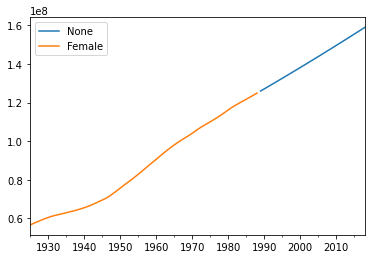

In [87]:
#Plot female predictions vs train model
female_pred.plot(legend=True)
train['Female'].plot(legend=True)


<AxesSubplot:>

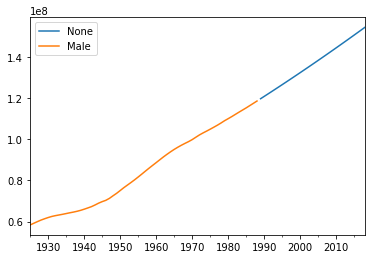

In [88]:
#Plot male predictions vs. train model
male_pred.plot(legend=True)
train['Male'].plot(legend=True)

In [94]:
#Get RMSE for female data
from sklearn.metrics import mean_squared_error
from math import sqrt
female_rmse=sqrt(mean_squared_error(female_pred, test['Female']))
print(female_rmse)

5352209.550575537


In [95]:
#Get RMSE for male data
from sklearn.metrics import mean_squared_error
from math import sqrt
male_rmse=sqrt(mean_squared_error(male_pred, test['Male']))
print(male_rmse)

5508121.193804434


In [98]:
#Begin future predicitions for female data
female2=ARIMA(gender_index['Female'], order=(0,2,0))
female2=female2.fit()
gender_index.tail()

,Male,Female,Total
2014-01-01,156254555.0,161270076.0,317524631.0
2015-01-01,157494939.0,162463106.0,319958045.0
2016-01-01,158894847.0,163666460.0,322311308.0
2017-01-01,159873950.0,164783019.0,324656969.0
2018-01-01,161038218.0,165932991.0,326971209.0


In [101]:
#Begin future predicitions for male data
male2=ARIMA(gender_index['Male'], order=(0,2,0))
male2=male2.fit()
gender_index.tail()

,Male,Female,Total
2014-01-01,156254555.0,161270076.0,317524631.0
2015-01-01,157494939.0,162463106.0,319958045.0
2016-01-01,158894847.0,163666460.0,322311308.0
2017-01-01,159873950.0,164783019.0,324656969.0
2018-01-01,161038218.0,165932991.0,326971209.0


In [119]:
#Add future dates for prediction
future_female=pd.date_range(start='2018-01-01', end = '2018-04-01')
fem_pred=female2.predict(start=len(gender_index), end=len(gender_index)+90, typ='levels').rename('Female ARIMA Predictions')
fem_pred.index=future_female

future_male=pd.date_range(start='2018-01-01', end = '2018-04-01')
male_pred=male2.predict(start=len(gender_index), end=len(gender_index)+90, typ='levels').rename('Male ARIMA Predictions')
male_pred.index=future_female

<AxesSubplot:>

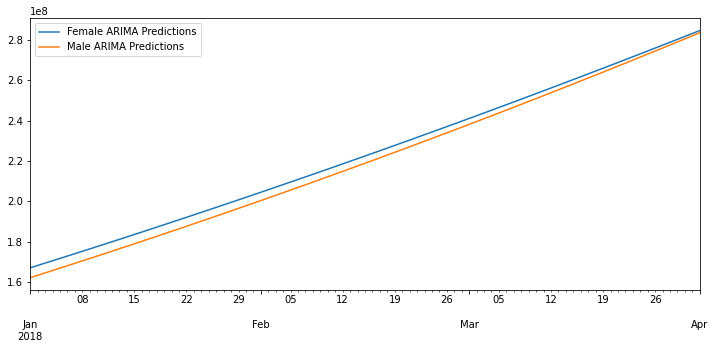

In [120]:
fem_pred.plot(figsize=(12,5), legend=True)
male_pred.plot(figsize=(12,5), legend=True)